### Hypotheses:

    - Article tags matter
    - Capitalization in your titles matters 
    - Length matters

# Preloading

In [913]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from dateutil.parser import parse


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [914]:
def join_month_data(months):
    ''' 
    Pastes my monthly datasets together into a single DataFrame.
    '''
    csv_path = f'{months[0]}_2018_data.csv'
    joined_df = pd.read_csv(csv_path)
        
    if len(months) > 1:
        for month in months[1:]:
            csv_path = f'{month}_2018_data.csv'
            joined_df = pd.concat([joined_df, pd.read_csv(csv_path)], axis=0, ignore_index=True)
        return joined_df
            
    else:
        return joined_df

def count_words(a_string):
    """
    Counts number of words in a string.
    """
    return len(a_string.split())
    
def count_items(a_list):
    """
    Counts number of items in a list.
    """
    if a_list == 'None':
        return 0
    elif a_list is None:
        return 0
    else:
        return len(a_list)

def count_paragraph_words(paragraph_list):
    n_words = sum([count_words(p) for p in paragraph_list])
    return n_words
    
def mean_words(text_list):
    if len(text_list) == 0:
        return 0
    else:
        mean_length = round(np.mean([count_words(p) for p in text_list]))
        return int(mean_length)
    
def to_dt(date_string):
    if date_string == 'skip':
        return 'skip'
    else:
        return parse(date_string)

### Load data

In [915]:
# load up data
months = ['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec']
df = join_month_data(months[:12])

print(df.shape)
df.head()

(14855, 22)


,title,subtitle,tags,author,h1_headers,h2_headers,paragraphs,blockquotes,bold_text,italic_text,n_figures,n_bullet_lists,n_numbered_lists,n_gists,n_code_chunks,n_vids,n_links,publication,read_time,n_responses,n_claps,date
0,AI and Machine Learning in Cyber Security,What Zen Teaches About Insights,"['Machine Learning', 'AI', 'Data Science', 'Cy...",Formulated.by,"['Zen and Cyber Security', 'AI in Cyber Securi...",None,['Zen monks have been using a tool called a ko...,['“Zen is like a man hanging by his teeth in a...,"['koan', 'context', 'expert knowledge', 'Upcom...",None,2.0,0.0,0.0,0.0,0.0,0.0,17.0,Towards Data Science,7.0,3,771,"Jan 1, 2018"
1,Redefining statistical significance: the stati...,Part two of a three part series,"['Data Science', 'Statistics', 'Bayesian Stati...",Richard D. Morey,None,['Do Bayes factors overstate the statistical e...,"['[Part one of this series is here]', 'At the ...",[],"['The purpose of significance testing.', 'The ...","['[Part one of this series is', 'here', ']', '...",8.0,1.0,4.0,0.0,0.0,0.0,23.0,None,22.0,7,78,"Jan 1, 2018"
2,I do not understand t-SNE — Part 1,or my quest to understand t-SNE,"['Machine Learning', 'Tsne', 'Data Science', '...",Ankit Goyal,['SNE - Explained (Cliché)'],"['Probability Function', 'Shannon Entropy', 'K...",['t-SNE (or t-distributed Stochastic Neighbor ...,['One missing piece of the puzzle is the choic...,"['Information entropy', 'inversely proportiona...","['Kullback Leibler divergence', 'Shannon Entro...",10.0,0.0,0.0,0.0,0.0,0.0,15.0,None,7.0,2,181,"Jan 1, 2018"
3,Statistical Analysis with Python: Pokémon,Editor Ishmael Njie,"['Data Science', 'Statistics', 'Pokemon', 'Mat...",DataRegressed Team,None,None,"['Why analyse Pokémon?', 'I wanted to start of...",[],"['2. Type Analysis', '3. Base Stat Analysis']",None,31.0,3.0,0.0,0.0,0.0,0.0,4.0,DataRegressed,6.0,0,111,"Jan 1, 2018"
4,สอนให้เครื่องจักรเข้าใจภาษามนุษย์ภายใน code 3 ...,None,"['NLP', 'Data Science', 'Machine Learning', 'P...",DumpDataSci,None,None,['หมายเหตุ: บทความนี้เน้นที่ความง่าย ในการทำ T...,"['pip install pythainlp', 'from pythainlp.sent...",['หมายเหตุ: บทความนี้เน้นที่ความง่าย ในการทำ T...,None,1.0,0.0,1.0,0.0,0.0,0.0,3.0,None,1.0,1,42,"Jan 1, 2018"


# Cleaning

#### Dropping rows

In [916]:
# drop rows with na or nan 
na_rows = df.isna().any(axis=1)
df = df[np.logical_not(na_rows)]

# drop rows with 'skip' for date
df = df[df['date'] != 'skip']

# drop duplicates
# revisit this step; the first of a group of duplicates might not be the correct one
df = df.drop_duplicates(['title','author'])

df.shape

(14425, 22)

#### Convert list columns from string representations to actual lists

In [917]:
# convert list columns: string representations to actual lists
list_cols = ['tags','h1_headers', 'h2_headers', 'paragraphs', 'bold_text', 'italic_text', 'blockquotes']
df[list_cols] = df[list_cols].applymap(lambda x: literal_eval(x))

# drop rows without list of tags
df = df[~df['tags'].isna()]

df['tags'].isna().sum()

0

#### Create basic features

In [918]:
# word count
df['title_length'] = df['title'].map(count_words)
df['subtitle_length'] = df['subtitle'].map(count_words)

# count number of text attributes
df['n_tags'] = df['tags'].map(count_items)
df['n_h1_headers'] = df['h1_headers'].map(count_items)
df['n_h2_headers'] = df['h2_headers'].map(count_items)
df['n_paragraphs'] = df['paragraphs'].map(count_items)
df['n_bold_text'] = df['bold_text'].map(count_items)
df['n_italic_text'] = df['italic_text'].map(count_items)
df['n_blockquotes'] = df['blockquotes'].map(count_items)

# calculate number of pictures
df['n_pics'] = df['n_figures'] - df['n_gists'] - df['n_vids']
df = df.drop('n_figures', axis=1)

# length attributes
df['article_length'] = df['paragraphs'].map(count_paragraph_words)
df['mean_paragraph_length'] = df['paragraphs'].map(mean_words)

# date features  
df['date'] = df['date'].map(to_dt)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

# consider getting season
season_dict = {
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
    12: 'winter'
}

df['season'] = df['month'].map(lambda x: season_dict[x])

Quick peek at current features.

In [919]:
# features
df.columns

Index(['title', 'subtitle', 'tags', 'author', 'h1_headers', 'h2_headers',
       'paragraphs', 'blockquotes', 'bold_text', 'italic_text',
       'n_bullet_lists', 'n_numbered_lists', 'n_gists', 'n_code_chunks',
       'n_vids', 'n_links', 'publication', 'read_time', 'n_responses',
       'n_claps', 'date', 'title_length', 'subtitle_length', 'n_tags',
       'n_h1_headers', 'n_h2_headers', 'n_paragraphs', 'n_bold_text',
       'n_italic_text', 'n_blockquotes', 'n_pics', 'article_length',
       'mean_paragraph_length', 'year', 'month', 'day', 'day_of_week',
       'season'],
      dtype='object')

# Quick view of claps

Number of claps is highly skewed.

In [920]:
from scipy.stats import skew

In [921]:
skew(df['n_claps'])

19.740814131326825

Text(0.5, 0, 'Number of claps')

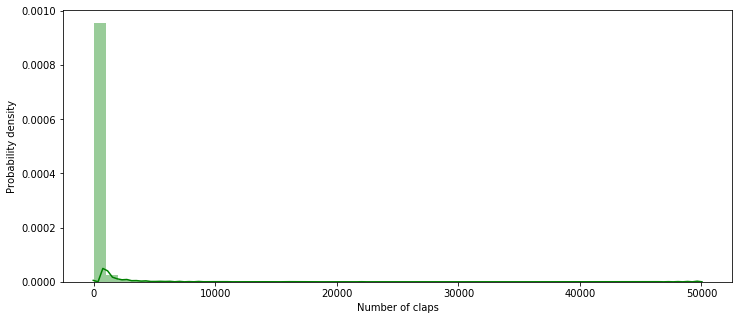

In [922]:
plt.figure(figsize=(12,5))
#plt.hist(df['n_claps']);
sns.distplot(df['n_claps'],color='green');
plt.ylabel('Probability density');
plt.xlabel('Number of claps')

In [923]:
df['n_claps'].describe()

count    14424.000000
mean       226.216237
std       1082.571020
min          0.000000
25%          1.000000
50%         18.000000
75%        121.000000
max      50000.000000
Name: n_claps, dtype: float64

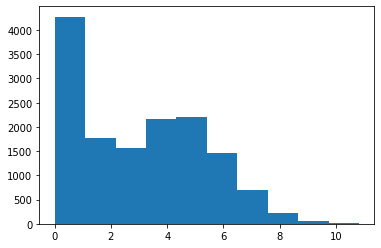

In [924]:
plt.hist(np.log(df['n_claps']+1));

In [925]:
skew(np.log(df['n_claps'] + 1))

0.2569913619938284

Log is probably as good as it will get.

#### Stratified train-test split, according to clap groupings.

In [926]:
# how much to have in each category
print(f"Each group should be about {(len(df)/4)} rows.", end='\n\n')

# try to group observations into equally sized groups
print(pd.cut(df['n_claps'], [-1, 1, 30, 150, 50001], labels=['group 1','group 2','group 3','group 4']).value_counts())

# create group
df['clap_group'] = pd.cut(df['n_claps'], [-1, 1, 30, 150, 50001], labels=['group 1','group 2','group 3','group 4'])

Each group should be about 3606.0 rows.

group 1    4274
group 2    3630
group 3    3341
group 4    3179
Name: n_claps, dtype: int64


In [927]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['n_claps'], axis=1)
y = df['n_claps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4, stratify=df['clap_group'])

In [928]:
print('Clap distribution is better preserved.',
      X_train.clap_group.value_counts()/len(X_train),
      X_test.clap_group.value_counts()/len(X_test), sep='\n\n')

X_train = X_train.drop('clap_group', axis=1)
X_test = X_test.drop('clap_group', axis=1)

Clap distribution is better preserved.

group 1    0.296300
group 2    0.251668
group 3    0.231649
group 4    0.220383
Name: clap_group, dtype: float64

group 1    0.296360
group 2    0.251646
group 3    0.231542
group 4    0.220451
Name: clap_group, dtype: float64


### Plots

In [929]:
y_train_log = np.log(y_train+1)

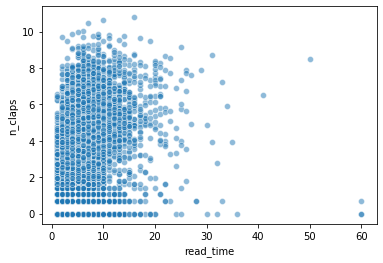

In [930]:
sns.scatterplot(X_train['read_time'], y_train_log, alpha=.5)

# Baseline model 

In [931]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

scaler = StandardScaler()

Scale numeric features in data_sm.

In [932]:
data_sm = pd.concat([y_train, X_train], axis=1)
numeric_features = set(data_sm.select_dtypes('number').columns)
cat_features = ['day_of_week', 'month']
features_to_scale = list(numeric_features - set(cat_features))
data_sm['n_claps'] = np.log(data_sm['n_claps'] + 1)
data_sm[features_to_scale] = scaler.fit_transform(data_sm[features_to_scale])

In [933]:
model_features = features_to_scale + ['C(day_of_week)', 'C(season)']
model_features.remove('n_claps')
model_features.remove('n_responses')

def build_formula(response, features):
    return f'{response} ~ ' + (' + ').join(features) 

formula = build_formula('n_claps', model_features)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     97.74
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:48:54   Log-Likelihood:                -15064.
No. Observations:               11539   AIC:                         3.019e+04
Df Residuals:                   11508   BIC:                         3.042e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.09

Skew and Kurtosis fixed.

- Condition number is high: high collinearity coming from categorical features - month and season... removed month 
- Omnibus and Durbin-Watson are high: non-normal residuals


# Explore top article tags

I want to turn tags into features. My strategy: take the n most common article tags, plug them into an OLS regression, and see how they fare.

### Turn most popular article tags into features

In [934]:
from itertools import chain
from collections import Counter

def get_chained_list(column):
    """
    Useful for DataFrame columns with list values. Consolidates values from each list into one single list. 
    """
    return list(chain(*column[~column.isna()]))

def get_top_names(column, top_n=10):
    """
    Extract top names from a column of name lists.
    """
    chained_list = get_chained_list(column)
    top_names = [t[0] for t in Counter(chained_list).most_common(top_n)]     
    return top_names

def make_columns(column, top_names, suffix):
        df = pd.DataFrame()
                           
        for name in top_names:
                df[f"{suffix}_{name}"] = [1 if name in name_list else 0 for name_list in column]
                
        # turn spaces into underlines (to avoid syntax errors)
        df.columns = [col_name.replace(' ','_').replace('.','_') for col_name in list(df.columns)]
        
        return(df)

Define a transformer class to make things easier.

In [935]:
from sklearn.base import BaseEstimator, TransformerMixin

class TopTagEncoder(BaseEstimator, TransformerMixin):
    """
    Transforms DataFrame by encoding top n article tags as column features.
    
    Attributes 
    ----------
    df_features : column names for output DataFrame
    tag_features : column names for tag features
    """
    def __init__(self, n):
        self.top_n = n
        self.top_tags = []
        self.tag_features = []
        self.df_features = []
        
    def fit(self, X, y=None):
        self.top_tags = get_top_names(X['tags'], self.top_n)
        return self
    
    def transform(self, X, y=None):
        tags_df = make_columns(X['tags'], self.top_tags, 'tag')
        tags_df = tags_df.set_index(X.index)
        self.tag_features = list(tags_df.columns)
        
        return_df = pd.concat([X, tags_df], axis=1)
        self.df_features = list(return_df.columns)
        return return_df

Some tags are lowercase; i.e. 'Data Science' and 'data science' exist. However, they're separate tag entities so I'm not going to standardize the tags with `lower()`.

In [936]:
tag_encoder= TopTagEncoder(30)
X_train = tag_encoder.fit_transform(X_train)
X_test = tag_encoder.transform(X_test)

In [937]:
def ols_summary(X_train, y_train):
    X_train_sm = X_train
    data_sm = pd.concat([np.log(y_train+1), X_train], axis=1)
    
    numeric_features = set(data_sm.select_dtypes('number').columns)
    cat_features = ['day_of_week', 'month']
    features_to_scale = list(numeric_features - set(cat_features))
    
    data_sm[features_to_scale] = scaler.fit_transform(data_sm[features_to_scale])
    
    model_features = features_to_scale + ['C(day_of_week)', 'C(season)']
    model_features.remove('n_claps')
    model_features.remove('n_responses')
    
    formula = build_formula('n_claps', model_features)
    mod = smf.ols(formula, data_sm)
    res = mod.fit()
    print(res.summary())
    
    return mod

In [938]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     75.12
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:48:55   Log-Likelihood:                -14462.
No. Observations:               11539   AIC:                         2.905e+04
Df Residuals:                   11478   BIC:                         2.949e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Article tags add a significant boost to R-squared.

In [939]:
list(X_train[X_train['n_tags']>5]['tags'])

[['artificial pictures of food dishes',
  'now Instagram',
  'Machine Learning',
  'Deep Learning',
  'Computer Vision',
  'Data Science',
  'Artificial Intelligence'],
 ['Most Active!',
  'Tips & Tricks',
  'How-To',
  'Power Query',
  'ASAP Utilities',
  'Data Science',
  'Data Analytics',
  'Data Analysis',
  'Excel',
  'How To'],
 ['Backend',
  'Product',
  'Security',
  'Web',
  'Mobile',
  'Data Science',
  'Publication',
  'Tech',
  'Machine Learning',
  'Artificial Intelligence'],
 ['healthit.gov',
  'https://dashboard.healthit.gov/quickstats/pages/FIG-Hospital-Adoption-Meaningful-Use-Stage-Two-2013.php',
  'Healthcare',
  'Machine Learning',
  'Artificial Intelligence',
  'Medicine',
  'Data Science'],
 ['we released Plotly.js v1.32.0',
  'Data Visualization',
  'Plotly',
  'D3js',
  'Python',
  'Data Science'],
 ['AI',
  'Nov 28, 2018',
  'Machine Learning',
  'Deep Learning',
  'Artificial Intelligence',
  'Python',
  'Data Science'],
 ['Machine Learning',
  'Deep Learning',

Text(0.5, 0, 'Number of tags')

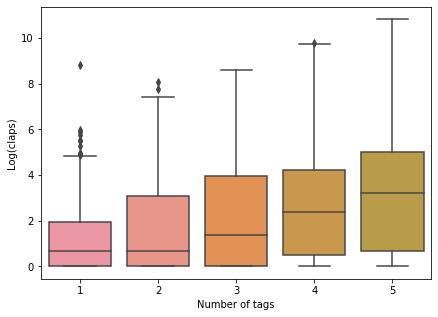

In [940]:
plt.figure(figsize=(7,5))

sns.boxplot(X_train['n_tags'], y_train_log)
plt.xlim(-.5,4.5)
plt.ylabel('Log(claps)')
plt.xlabel('Number of tags')

Text(0.5, 1.0, 'Articles with Machine Learning tag get more claps.')

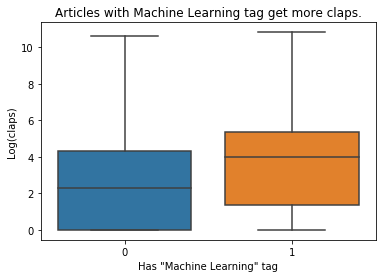

In [941]:
sns.boxplot(X_train['tag_Machine_Learning'], y_train_log)
plt.xlabel('Has "Machine Learning" tag')
plt.ylabel('Log(claps)')
plt.title('Articles with Machine Learning tag get more claps.')

# Explore top publications 

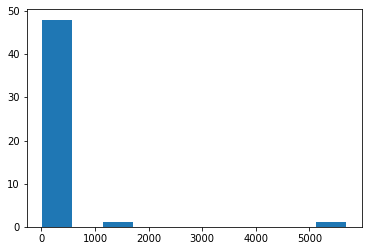

In [942]:
plt.hist(X_train['publication'].value_counts()[:50]);

Extremely skewed, in favor of a few big publications.

In [943]:
Counter(X_train['publication']).most_common(25)

[('None', 5689),
 ('Towards Data Science', 1655),
 ('Data Driven Investor', 219),
 ('HackerNoon.com', 103),
 ('freeCodeCamp.org', 61),
 ('Good Audience', 44),
 ('Analytics Vidhya', 43),
 ('Budding Data Scientists', 42),
 ('Cambridge Spark', 42),
 ('The Startup', 38),
 ('Center for Data Science', 38),
 ('learn data science', 35),
 ('Becoming Human: Artificial Intelligence Magazine', 35),
 ('dair.ai', 34),
 ('Coinmonks', 33),
 ('Ciencia y Datos', 27),
 ('Noteworthy - The Journal Blog', 27),
 ('Ensina.AI', 24),
 ('The Circular Theory', 23),
 ('Openbridge', 22),
 ('Acing AI', 21),
 ('ARCHITECHT', 20),
 ('Clutch.AI', 20),
 ('Heartbeat', 20),
 ('Creative Analytics', 19)]

Just keep the top 10. Even that is a slight stretch because it's such a low percentage of the articles. However, based on my own knowledge, like Analytics Vidhya and freeCodeCamp and Cambridge Spark have strong brand recognition even if they don't publish that frequently.

Everything other than the top 10 will be ignored. 

In [944]:
class TopPublicationEncoder(BaseEstimator, TransformerMixin):
    """
    Transforms DataFrame by encoding top n publications as column features.
    
    Attributes 
    ----------
    df_features : column names for output DataFrame
    publication_features : column names for tag features
    """
    def __init__(self, n):
        self.top_n = n
        self.top_publications = []
        self.publication_features = []
        self.df_features = []
        
    def fit(self, X, y=None):
        self.top_publications = [t[0] for t in Counter(X['publication']).most_common(self.top_n)]    
        return self
    
    def transform(self, X, y=None):
        publications_df = make_columns(X['publication'], self.top_publications, 'publication')
        publications_df = publications_df.set_index(X.index)
        self.tag_features = list(publications_df.columns)
        
        return_df = pd.concat([X, publications_df], axis=1)
        self.df_features = list(return_df.columns)
        return return_df

In [945]:
publication_encoder = TopPublicationEncoder(10)
X_train = publication_encoder.fit_transform(X_train)
X_test = publication_encoder.transform(X_test)

In [946]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:48:57   Log-Likelihood:                -13284.
No. Observations:               11539   AIC:                         2.671e+04
Df Residuals:                   11468   BIC:                         2.723e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Another significant boost to R-squared from encoding publications. Moral of the story: if you plan to write on Medium, make it a goal to publish under a publication. Not publishing under a publication has a dramatic effect on visibility, and therefore decreases claps. Go with either Towards Data Science or FreeCodeCamp.

Omnibus value has decreased significantly, which means the residuals are becoming more normal. Bias is decreasing.

Text(0, 0.5, 'Log(claps)')

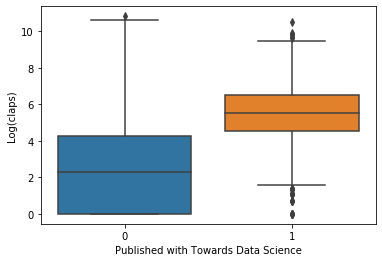

In [947]:
sns.boxplot(X_train['publication_Towards_Data_Science'],y_train_log);
plt.xlabel('Published with Towards Data Science')
plt.ylabel('Log(claps)')

Text(0, 0.5, 'Log(claps)')

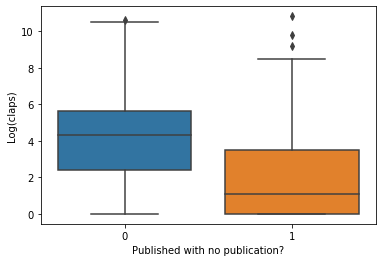

In [948]:
sns.boxplot(X_train['publication_None'],y_train_log);
plt.xlabel('Published with no publication?')
plt.ylabel('Log(claps)')

# Title features

### (a) Does title case matter? 

Catch these using `str.istitle()` method. This takes some cleaning but will be fun to plug into the model.

Have to remove: all caps words, stop words, punctuation. Then apply `istitle()`.

In [949]:
df['title'].head()

0            AI and Machine Learning in Cyber Security
1    Redefining statistical significance: the stati...
2                   I do not understand t-SNE — Part 1
3            Statistical Analysis with Python: Pokémon
4    สอนให้เครื่องจักรเข้าใจภาษามนุษย์ภายใน code 3 ...
Name: title, dtype: object

In [950]:
import re

def capitalize_first(a_string):
    '''
    Capitalizes first letter of a string. 
    '''
    try:
        new_string = a_string[0].upper() + a_string[1:]
        return new_string
    except:
        print('Invalid string')
        
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
              'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 
              'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
              'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
              'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
              'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
              'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'all', 'any', 'both', 
              'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
              'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',
              'is', 'a', 'the', 'and', 'over', 'in', 'of']

def remove_stop_words(a_string, stop_words):
    """
    Helper function that removes stop words. Looks them in three ways: lowercase, title case, and all caps.
    """
    stop_words = stop_words + [capitalize_first(x) for x in stop_words] + [x.upper() for x in stop_words]
    non_stop_words = [x for x in a_string.split() if x not in stop_words]
    return ' '.join(non_stop_words)   

def remove_punctuation(a_string):
    """
    Helper function that removes punctuation.
    """
    new_string = re.sub('\.|\||\(|\)|!|\?|·|—|&|…|:','', a_string)
    return new_string

def clean_string(a_string, stop_words):
    """
    Removes stop words and punctuation from a string.
    """
    new_string = remove_punctuation(a_string)
    new_string = remove_stop_words(new_string, stop_words)
    
    return new_string

def remove_upper(a_string):
    """
    Removes words that are in all caps.
    """
    upper_words = a_string.upper().split()
    non_upper = [x for x in a_string.split() if x not in upper_words]
    return ' '.join(non_upper)

def is_title_case(a_string, stop_words):
    """
    Checks if a string is capitalized like a title. Ignores stop words and punctuation.
    """
    cleaned_string = clean_string(remove_upper(a_string), stop_words)
    
    if cleaned_string.istitle():
        return 1
    else:
        return 0

In [951]:
X_train['title_is_title_case'] = X_train['title'].map(lambda x: is_title_case(x, stop_words))
X_test['title_is_title_case'] = X_test['title'].map(lambda x: is_title_case(x, stop_words))

ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     114.5
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:49:00   Log-Likelihood:                -13282.
No. Observations:               11539   AIC:                         2.671e+04
Df Residuals:                   11467   BIC:                         2.724e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Text(0.5, 0, 'Title is title case')

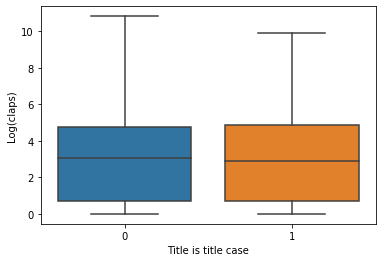

In [952]:
sns.boxplot(X_train['title_is_title_case'], y_train_log)
plt.ylabel('Log(claps)')
plt.xlabel('Title is title case')

**Title case seems not to matter! Failed to reject null, title case insignificant to claps.**

### b) Top title keywords

In [953]:
# Consider optimizing this later

title_words = list(chain(*X_train['title'].map(lambda x: x.split())))
title_words = [clean_string(x, stop_words) for x in title_words]
title_words = [x.lower() for x in title_words if len(x) > 1]

Counter(title_words).most_common(50)

[('data', 3744),
 ('science', 1400),
 ('learning', 1200),
 ('how', 926),
 ('machine', 846),
 ('python', 686),
 ('part', 569),
 ('using', 547),
 ('ai', 402),
 ('analysis', 379),
 ('analytics', 316),
 ('2018', 313),
 ('scientist', 282),
 ('why', 278),
 ('de', 261),
 ('deep', 255),
 ('big', 203),
 ('regression', 200),
 ('intelligence', 190),
 ('introduction', 187),
 ('new', 171),
 ('model', 165),
 ('business', 155),
 ('artificial', 154),
 ('guide', 142),
 ('neural', 142),
 ('linear', 140),
 ('building', 139),
 ('week', 133),
 ('time', 131),
 ('vs', 128),
 ('pandas', 126),
 ('models', 125),
 ('world', 124),
 ('scientists', 123),
 ('use', 121),
 ('top', 120),
 ('first', 120),
 ('learn', 118),
 ('visualization', 117),
 ('classification', 116),
 ('best', 114),
 ('need', 111),
 ('journey', 105),
 ('statistics', 103),
 ('project', 102),
 ('series', 101),
 ('day', 101),
 ('network', 101),
 ('code', 99)]

In [954]:
class TopKeywordEncoder(BaseEstimator, TransformerMixin):
    """
    Transforms DataFrame by encoding top n keywords as column features.
    
    Arguments
    ----------
    keyword_type : string, column name
    n : top n keywords to encode
    
    Attributes 
    ----------
    df_features : column names for output DataFrame
    publication_features : column names for tag features
    """
    def __init__(self, keyword_type, n, stop_words):
        self.keyword_type = keyword_type
        self.stop_words = stop_words
        self.top_n = n
        self.top_keywords = []
        self.keyword_features = []
        self.df_features = []
        
    def fit(self, X, y=None):
        # split and clean words
        words = list(chain(*X_train[self.keyword_type].map(lambda x: x.split())))
        words = [clean_string(x, stop_words) for x in words]
        words = [x.lower() for x in title_words if len(x) > 1]
        
        self.top_keywords = [item[0] for item in Counter(words).most_common(self.top_n)]
        return self
    
    def transform(self, X, y=None):
        keywords_df = make_columns(X[self.keyword_type], self.top_keywords, f'{self.keyword_type}_keyword')
        keywords_df = keywords_df.set_index(X.index)
        self.tag_features = list(keywords_df.columns)
        
        return_df = pd.concat([X, keywords_df], axis=1)
        self.df_features = list(return_df.columns)
        return return_df

In [955]:
title_encoder = TopKeywordEncoder('title', 25, stop_words)
X_train = title_encoder.fit_transform(X_train)
X_test = title_encoder.transform(X_test)

In [956]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     85.67
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:49:15   Log-Likelihood:                -13248.
No. Observations:               11539   AIC:                         2.669e+04
Df Residuals:                   11442   BIC:                         2.740e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Text(0, 0.5, 'Log(claps)')

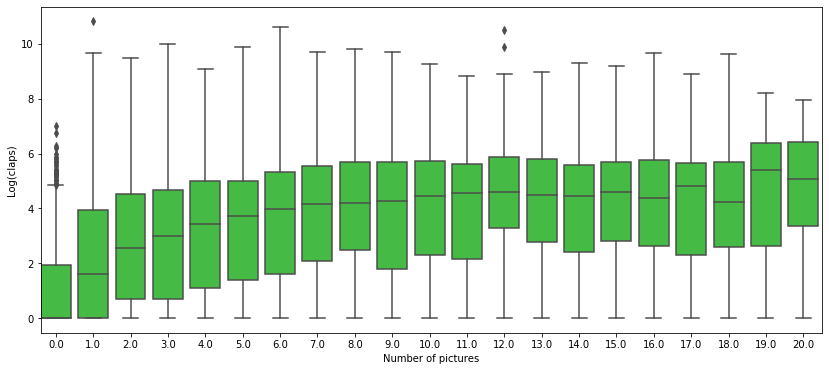

In [957]:
plt.figure(figsize=(14,6))
sns.boxplot(X_train['n_pics'], y_train_log, color='limegreen')
plt.xlim(-.4,20.5)
plt.xlabel('Number of pictures')
plt.ylabel('Log(claps)')

Text(0, 0.5, 'Log(claps)')

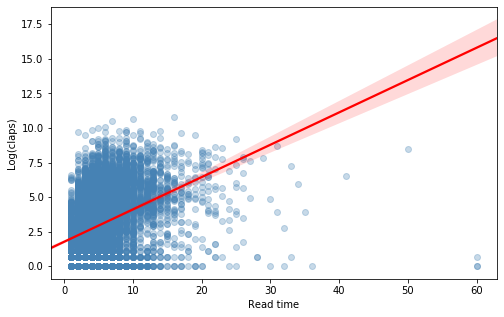

In [958]:
plt.figure(figsize=(8,5))
sns.regplot(X_train['read_time'], y_train_log,
           scatter_kws={'alpha':0.3,'color':'steelblue'},color='red')
plt.xlabel('Read time')
plt.ylabel('Log(claps)')

**Title keywords don't really matter. The only keyword that seems to have a significant affect on claps is "data". Other than that, it doesn't seem like that critical. This makes sense; you can't just predict how well an article can do based on a few title keywords. The content probably matters much more.**

A next step for future analysis: analyze phrases.

# Paragraph features

### How many digits are there in the paragraphs?

In [959]:
def count_digits(a_string):
    digit_string = ''.join(char for char in a_string if char.isdigit())
    return len(digit_string)

def count_digits_list(string_list):
    return sum([count_digits(string) for string in string_list])

In [960]:
X_train['n_digits_paragraph'] = X_train['paragraphs'].map(count_digits_list)
X_test['n_digits_paragraph'] = X_test['paragraphs'].map(count_digits_list)

In [961]:
X_train['n_digits_title'] = X_train['title'].map(count_digits)
X_test['n_digits_title'] = X_test['title'].map(count_digits)

In [962]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     84.46
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:49:25   Log-Likelihood:                -13232.
No. Observations:               11539   AIC:                         2.666e+04
Df Residuals:                   11440   BIC:                         2.739e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Number of digits in paragraph has a significant effect, at small coefficient. Consider use quadratic version.

### Readability score for paragraphs

Package installs...

In [963]:
#import sys 
#print(sys.executable)
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en_core_web_lg
#!{sys.executable} -U textacy
#!{sys.executable} -m spacy download en_core_web_lg
#!{sys.executable} -m pip install spacy-readability
#!{sys.executable} -m spacy download en
#!{sys.executable} -m pip install textstat

In [964]:
import textstat

def join_paragraphs(paragraph_list):
    return ' '.join(paragraph_list)

def paragraphs_grade_lvl(paragraphs_list):
    text = join_paragraphs(paragraphs_list)
    return textstat.flesch_kincaid_grade(text)

In [965]:
X_train['article_grade_lvl'] = X_train['paragraphs'].map(paragraphs_grade_lvl)
X_test['article_grade_lvl'] = X_test['paragraphs'].map(paragraphs_grade_lvl)

In [966]:
X_train['title_grade_lvl'] = X_train['title'].map(textstat.flesch_kincaid_grade)
X_test['title_grade_lvl'] = X_test['title'].map(textstat.flesch_kincaid_grade)

In [967]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     82.76
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:50:48   Log-Likelihood:                -13232.
No. Observations:               11539   AIC:                         2.667e+04
Df Residuals:                   11438   BIC:                         2.741e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [968]:
X_train['article_grade_lvl']

2771     20.2
6731     10.5
14750     8.3
4610      9.2
12652    10.3
         ... 
4117      6.9
13544    11.7
55       12.6
10808    10.8
2800     14.2
Name: article_grade_lvl, Length: 11539, dtype: float64

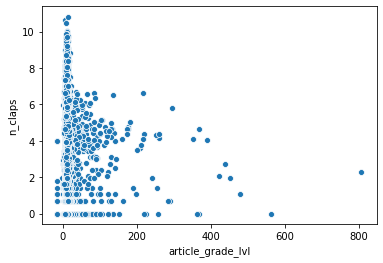

In [969]:
sns.scatterplot(X_train['article_grade_lvl'], y_train_log)

There's definitely no grade level past 18, but there's a lot of foreign languages past 16, so I'll cut it off a little earlier.

In [970]:
def is_English(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [971]:
train_foreign = ((X_train['article_grade_lvl'] > 16) & (~X_train['title'].apply(is_English)))
test_foreign = ((X_test['article_grade_lvl'] > 16) & (~X_test['title'].apply(is_English)))

In [972]:
X_train = X_train[~train_foreign]
X_test = X_test[~test_foreign]

y_train = y_train[~train_foreign]
y_test = y_test[~test_foreign]

X_train.shape
X_test.shape

(2759, 107)

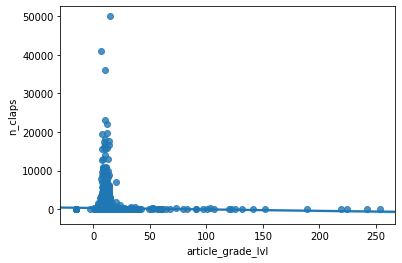

In [973]:
sns.regplot(X_train['article_grade_lvl'], y_train)

In [974]:
train_grade_high = X_train['article_grade_lvl'] > 50
test_grade_high = X_test['article_grade_lvl'] > 50

In [975]:
X_train = X_train[~train_grade_high]
X_test = X_test[~test_grade_high]

In [976]:
y_train = y_train[~train_grade_high]
y_test = y_test[~test_grade_high]

In [977]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     82.69
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:50:50   Log-Likelihood:                -12519.
No. Observations:               11012   AIC:                         2.524e+04
Df Residuals:                   10911   BIC:                         2.598e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Text(0.5, 0, 'Article grade level (flesch-kincaid)')

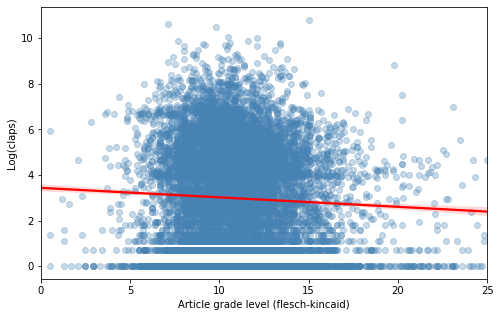

In [978]:
plt.figure(figsize=(8,5))
sns.regplot(X_train['article_grade_lvl'], np.log(y_train+1), 
            scatter_kws={'alpha':0.3,'color':'steelblue'},
            color='red')
plt.xlim(0,25)
plt.ylabel('Log(claps)')
plt.xlabel('Article grade level (flesch-kincaid)')

(0, 500)

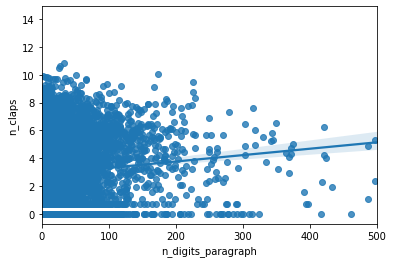

In [979]:
sns.regplot(X_train['n_digits_paragraph'], np.log(y_train+1))
plt.xlim(0,500)

Text(0.5, 0, 'Has code chunks')

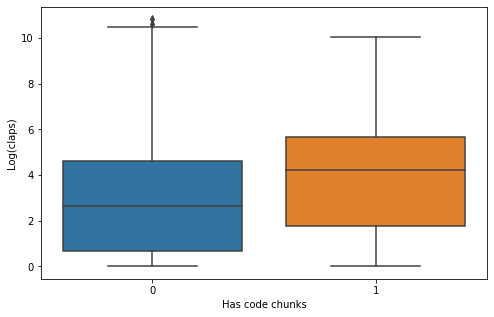

In [980]:
# plt.figure(figsize=(8,5))
# sns.regplot(X_train['n_code_chunks'], np.log(y_train+1), 
#             scatter_kws={'alpha':0.3,'color':'steelblue'},
#             color='red')
# plt.xlim(0,25)
# plt.ylabel('Log(claps)')
# plt.xlabel('Number of code chunks')

plt.figure(figsize=(8,5))
sns.boxplot([1 if n > 0 else 0 for n in X_train['n_code_chunks']], np.log(y_train+1))
plt.ylabel('Log(claps)')
plt.xlabel('Has code chunks')

Ideal reading level is around around 10. Higher grade levels indicate typos or non-recognizable English. Overall,  difficulty of reading is important for claps.

### Sentiment score of title

Install Vader...

In [981]:
#!{sys.executable} -m pip install vaderSentiment

In [982]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

X_train['sentiment_title'] = [analyzer.polarity_scores(title)['compound'] for title in X_train['title']]
X_test['sentiment_title'] = [analyzer.polarity_scores(title)['compound'] for title in X_test['title']]

(0, 5000)

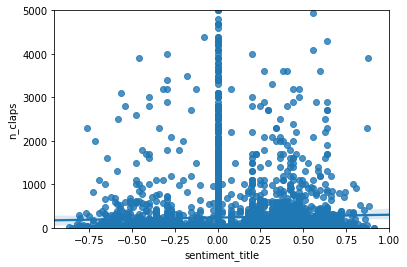

In [983]:
sns.regplot(X_train['sentiment_title'], y_train)
plt.ylim(0, 5000)

In [984]:
ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     81.89
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:50:56   Log-Likelihood:                -12519.
No. Observations:               11012   AIC:                         2.524e+04
Df Residuals:                   10910   BIC:                         2.599e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Title sentiment isn't really important.

# LASSO 

In [985]:
X_train['winter'] = [1 if season=='winter' else 0 for season in X_train['season']]
X_train['summer'] = [1 if season=='summer' else 0 for season in X_train['season']]
X_train['spring'] = [1 if season=='spring' else 0 for season in X_train['season']]

In [986]:
X_test['winter'] = [1 if season=='winter' else 0 for season in X_test['season']]
X_test['summer'] = [1 if season=='summer' else 0 for season in X_test['season']]
X_test['spring'] = [1 if season=='spring' else 0 for season in X_test['season']]

Regularize continuous features

In [987]:
list(X_train.select_dtypes(np.number).columns)

['n_bullet_lists',
 'n_numbered_lists',
 'n_gists',
 'n_code_chunks',
 'n_vids',
 'n_links',
 'read_time',
 'n_responses',
 'title_length',
 'subtitle_length',
 'n_tags',
 'n_h1_headers',
 'n_h2_headers',
 'n_paragraphs',
 'n_bold_text',
 'n_italic_text',
 'n_blockquotes',
 'n_pics',
 'article_length',
 'mean_paragraph_length',
 'year',
 'month',
 'day',
 'day_of_week',
 'tag_Data_Science',
 'tag_Machine_Learning',
 'tag_Artificial_Intelligence',
 'tag_Python',
 'tag_Data',
 'tag_Deep_Learning',
 'tag_Data_Analysis',
 'tag_Data_Visualization',
 'tag_Big_Data',
 'tag_AI',
 'tag_Analytics',
 'tag_Technology',
 'tag_Statistics',
 'tag_Programming',
 'tag_Towards_Data_Science',
 'tag_R',
 'tag_NLP',
 'tag_Startup',
 'tag_Education',
 'tag_Tech',
 'tag_Blockchain',
 'tag_Neural_Networks',
 'tag_Business',
 'tag_Marketing',
 'tag_Science',
 'tag_Software_Development',
 'tag_Business_Intelligence',
 'tag_Data_Engineering',
 'tag_Data_Analytics',
 'tag_Pandas',
 'publication_None',
 'publicati

In [988]:
model_features = set(X_train.select_dtypes(np.number).columns) - set(['year','n_responses','month','day', 'day_of_week'])

In [989]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[model_features]), columns=model_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[model_features]), columns=model_features)

In [990]:
from sklearn.linear_model import LassoCV

alphas = 10**np.linspace(-5,0,1000)
lasso_cv = LassoCV(alphas = alphas, cv=5)
lasso_cv.fit(X_train_scaled, np.log(y_train+1))
lasso_cv.alpha_

0.00897331581458352

In [991]:
from sklearn.linear_model import RidgeCV

ridge_alphas = 10**np.linspace(0,4,200)

ridge_modelCV = RidgeCV(ridge_alphas, cv=5)
ridge_modelCV.fit(X_train_scaled, np.log(y_train+1))
ridge_modelCV.alpha_

748.8103857590023

In [992]:
lasso_cv_coefs = list(zip(model_features, lasso_cv.coef_/scaler.scale_))
lasso_cv_coefs

[('tag_Data', -0.19065832821748163),
 ('title_keyword_2018', -0.04535171627054104),
 ('publication_None', -1.0819363657804641),
 ('title_keyword_model', 0.09144443072347387),
 ('title_keyword_python', 0.0029178494981130995),
 ('n_h1_headers', 0.0),
 ('title_keyword_deep', -0.0),
 ('tag_Software_Development', 0.7176669801533881),
 ('tag_Data_Analytics', -0.27488643919888855),
 ('tag_Technology', 0.11853158832038477),
 ('sentiment_title', -0.05377515133427774),
 ('tag_Deep_Learning', 0.5325846178172323),
 ('article_grade_lvl', -0.023173056420930066),
 ('publication_Analytics_Vidhya', 0.35861202563080424),
 ('tag_Science', 0.3726675662656506),
 ('title_keyword_business', -0.11286275238993977),
 ('tag_Artificial_Intelligence', 0.13493814135654367),
 ('read_time', 0.0711947904223798),
 ('title_keyword_ai', -0.014492268546229757),
 ('title_keyword_analytics', -0.24805128321581096),
 ('tag_Data_Visualization', 0.12235440317788732),
 ('title_keyword_intelligence', -0.17022673387912626),
 ('tit

In [1005]:
[x for x in lasso_cv_coefs if x[1] == 0]

[('n_h1_headers', 0.0),
 ('title_keyword_deep', -0.0),
 ('n_gists', 0.0),
 ('title_keyword_analysis', 0.0),
 ('publication_Data_Driven_Investor', 0.0),
 ('title_keyword_learning', 0.0),
 ('title_keyword_machine', 0.0),
 ('mean_paragraph_length', 0.0),
 ('n_bullet_lists', 0.0),
 ('title_keyword_scientist', 0.0),
 ('title_keyword_introduction', 0.0),
 ('title_keyword_how', -0.0),
 ('title_keyword_science', -0.0)]

- Code chunks are not relevant
- How is not important (writing instructinoal stuff
- Don't use number in yout title
- Deep Learning is a good topic to write about, as is Computer Vision
- Do NOT, not write as part of a publication
- Don't be afraid to write a longer article
- Articles do wellin spring?
- R is not popular
- Publish on HackerNoon
- Publish TowardsDataScience

In [1006]:
lasso_cv_features = [x[0] for x in lasso_cv_coefs if x[1] > 0]

# StatsModel from Lasso

In [999]:
'day_of_week' in lasso_cv_features

False

In [1007]:
data_sm = pd.concat([np.log(y_train+1), X_train[lasso_cv_features]], axis=1)    
data_sm[lasso_cv_features] = scaler.fit_transform(data_sm[lasso_cv_features])

formula = build_formula('n_claps', lasso_cv_features)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     135.2
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:                -22482.
No. Observations:               11012   AIC:                         4.507e+04
Df Residuals:                   10961   BIC:                         4.544e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

This model looks good.

# Check again

In [1008]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(lasso_cv.alpha_)
lasso_model.fit(X_train_scaled[lasso_cv_features], np.log(y_train+1))

Lasso(alpha=0.00897331581458352, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1010]:
y_pred = lasso_model.predict(X_test_scaled[lasso_cv_features])

In [1011]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [1013]:
mae(y_test, np.exp(y_pred))

187.34033016944994

In [1014]:
res = y_test - y_pred

Text(0, 0.5, 'Residuals')

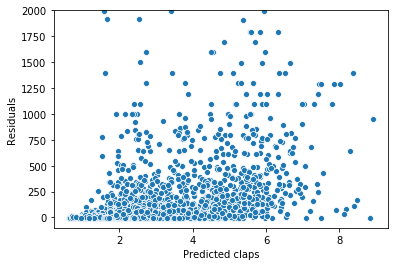

In [1018]:
sns.scatterplot(y_pred, res)
plt.ylim(-100,2000)
plt.xlabel('Predicted claps')
plt.ylabel('Residuals')

In [1017]:
res

5952     2893.905827
10350      -1.753500
1943     1296.196368
1051        5.440441
287       313.470269
            ...     
4807       64.633888
7651      187.694625
6299       -1.715661
9358      211.335825
14650      69.749570
Name: n_claps, Length: 2751, dtype: float64

In [ ]:
lasso_model.fit(X_)

In [609]:
list(zip(X_train_scaled.columns, lasso_model.coef_))

[('tag_Data', -0.038896233045591165),
 ('publication_Coinmonks', 0.04666639683257522),
 ('title_keyword_2018', -0.013924547769326058),
 ('tag_Data_Scientist', -0.5684984769198934),
 ('tag_Mathematics', 0.004711036658239982),
 ('publication_None', 0.08009516403386471),
 ('title_keyword_model', -0.029328562518994444),
 ('title_keyword_python', 0.05078579659286101),
 ('title_keyword_neural', 0.12002601464813924),
 ('tag_Fintech', -0.03203655171293014),
 ('n_h1_headers', 0.10341034901999664),
 ('title_keyword_deep', 0.03575554383278275),
 ('tag_Software_Development', 0.05897803274174943),
 ('tag_Data_Analytics', 0.04440854141137652),
 ('tag_Technology', -0.012587420715543508),
 ('sentiment_title', 0.06888267871050249),
 ('tag_Deep_Learning', -0.004475011184317516),
 ('title_keyword_week', 0.0324709857384439),
 ('tag_Design', 0.03359648894986356),
 ('article_grade_lvl', -0.0015300452686747596),
 ('tag_Healthcare', 0.03525152813410954),
 ('publication_Analytics_Vidhya', 0.12192100228540728),

In [610]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(ridge_modelCV.alpha_)
ridge_model.fit(X_train_scaled[filtered_features_2], np.log(y_train+1))

Ridge(alpha=573.8441648302393, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [611]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [612]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [614]:
print(np.mean(cross_val_score(ridge_model, X_train_scaled[filtered_features_2], np.log(y_train+1), cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lasso_model, X_train_scaled[filtered_features_2], np.log(y_train+1), cv=kf, scoring='r2')))

0.3979215072204026
0.3973000101013735


In [624]:
data_sm = pd.concat([np.log(y_train+1), X_train[model_features]], axis=1)
formula = build_formula('n_claps', filtered_features_2)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     98.16
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:00:58   Log-Likelihood:                -22124.
No. Observations:               10981   AIC:                         4.441e+04
Df Residuals:                   10902   BIC:                         4.498e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [623]:
data_sm = pd.concat([np.log(y_train+1), X_train[filtered_features_2]], axis=1)
formula = build_formula('n_claps', filtered_features_2)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     98.16
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:58:03   Log-Likelihood:                -22124.
No. Observations:               10981   AIC:                         4.441e+04
Df Residuals:                   10902   BIC:                         4.498e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Build residuals plot

# Predict on test data w best model

In [634]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [635]:
y_pred = ridge_modelCV.predict(X_test_scaled)

In [636]:
X_test_scaled

,tag_Data,publication_Coinmonks,title_keyword_2018,tag_Data_Scientist,tag_Mathematics,publication_None,title_keyword_model,title_keyword_python,title_keyword_neural,tag_Fintech,n_h1_headers,title_keyword_deep,tag_Software_Development,tag_Data_Analytics,tag_Technology,sentiment_title,tag_Deep_Learning,title_keyword_week,tag_Design,article_grade_lvl,tag_Healthcare,publication_Analytics_Vidhya,tag_Science,title_keyword_business,title_keyword_pandas,tag_Artificial_Intelligence,read_time,title_keyword_ai,tag_Web_Development,tag_Data_Visualization,title_keyword_analytics,title_keyword_intelligence,tuesday,title_keyword_new,winter,tag_Education,tag_Visualization,title_keyword_data,spring,tag_Privacy,title_keyword_de,n_gists,n_tags,title_is_title_case,tag_Data_Analysis,title_keyword_using,tag_Business,article_length,summer,tag_Data_Science,tag_Analytics,tag_Neural_Networks,n_code_chunks,n_blockquotes,title_grade_lvl,tag_Startup,title_keyword_linear,title_keyword_analysis,tag_Business_Intelligence,tag_Blockchain,publication_Data_Driven_Investor,tag_Finance,tag_Computer_Vision,subtitle_length,title_keyword_learning,publication_Cambridge_Spark,n_digits_title,title_keyword_part,title_keyword_building,tag_Marketing,tag_AI,title_keyword_why,title_keyword_machine,tag_Politics,tag_Statistics,tag_Tech,title_keyword_big,mean_paragraph_length,n_h2_headers,tag_Towards_Data_Science,n_vids,tag_Kaggle,tag_Engineering,title_length,publication_Good_Audience,n_bullet_lists,title_keyword_scientist,title_keyword_guide,tag_Learning,title_keyword_regression,title_keyword_artificial,tag_Algorithms,tag_Programming,title_keyword_introduction,n_numbered_lists,tag_Machine_Learning,wednesday,tag_Computer_Science,n_pics,tag_Coding,title_keyword_how,tag_Data_Engineering,tag_Big_Data,n_digits_paragraph,tag_Careers,tag_R,n_paragraphs,publication_HackerNoon_com,publication_freeCodeCamp_org,tag_Linear_Regression,publication_Towards_Data_Science,n_italic_text,title_keyword_science,tag_Python,tag_Pandas,tag_NLP,n_bold_text,tag_Cryptocurrency,publication_Center_for_Data_Science,n_links
0,-0.324133,-0.058928,-0.17739,-0.105555,-0.110726,-0.987241,-0.102423,-0.049647,-0.027001,-0.09292,-0.066634,-0.05573,-0.117284,-0.11405,-0.241047,-1.261992,-0.301137,-0.054061,-0.100129,0.496970,-0.094894,-0.065563,-0.123131,-0.061963,-0.05234,-0.430215,1.704665,-0.249189,-0.085667,-0.286877,-0.0627,-0.042716,-0.427984,-0.08727,-0.531815,-0.147236,-0.113228,-0.273647,-0.556137,-0.097783,-0.418260,-0.103169,-0.481046,1.051118,-0.292418,-0.176569,-0.130904,2.016915,-0.600318,0.038199,-0.265680,-0.134107,-0.297362,-0.328669,-0.784284,-0.144960,-0.034428,-0.090905,-0.1124,-0.146589,-0.145287,-0.089881,-0.089881,-0.305652,-0.136549,-0.060465,-0.382838,-0.081807,-0.041632,-0.125398,-0.27017,-0.068978,-0.100592,-0.098256,4.238568,-0.143314,-0.071595,-0.279228,0.968077,-0.186472,-0.170236,-0.094894,-0.085667,0.101438,-0.061219,-0.416042,-0.087798,-0.063427,-0.11405,-0.045814,-0.02864,-0.105995,-0.216117,-0.043773,-0.329896,1.241258,-0.459596,-0.114459,0.553437,-0.098256,-0.086739,-0.115273,-0.287249,2.788842,-0.091918,-0.160569,2.058784,-0.100129,-0.072869,-0.093912,-0.420811,-0.164966,-0.145614,-0.380693,-0.111147,-0.154497,0.462348,-0.111566,-0.059701,-0.471528
1,-0.324133,-0.058928,-0.17739,-0.105555,-0.110726,1.012924,-0.102423,-0.049647,-0.027001,-0.09292,-0.598781,-0.05573,-0.117284,-0.11405,-0.241047,1.069804,-0.301137,-0.054061,-0.100129,-1.005516,-0.094894,-0.065563,-0.123131,-0.061963,-0.05234,-0.430215,-0.870940,-0.249189,-0.085667,-0.286877,-0.0627,-0.042716,-0.427984,-0.08727,-0.531815,-0.147236,-0.113228,-0.273647,-0.556137,-0.097783,2.390859,-0.103169,0.066917,1.051118,-0.292418,-0.176569,-0.130904,-0.843931,1.665784,0.038199,3.763924,-0.134107,-0.297362,-0.328669,0.162133,6.898442,-0.034428,-0.090905,-0.1124,-0.146589,-0.145287,-0.089881,-0.089881,-0.305652,-0.136549,-0.060465,-0.382838,-0.081807,-0.041632,7.974592,-0.27017,-0.068978,-0.100592,-0.098256,-0.235929,-0.143314,-0.071

In [637]:
mae(y_test, np.exp(test_set_pred_ridge))

196.4144283234578

In [645]:
res = y_test - np.exp(y_pred)

(-10000, 10000)

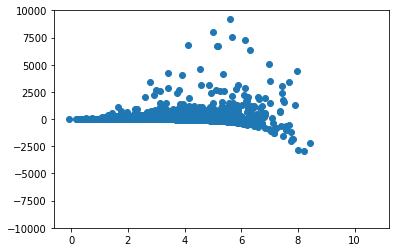

In [649]:
plt.scatter(y_pred,res)
plt.ylim(-10000,10000)

(0, 2500)

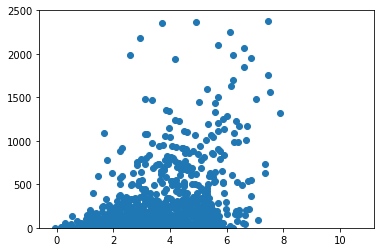

In [650]:
plt.scatter(test_set_pred_ridge,res)
plt.ylim(0,2500)

In [644]:
res

10082     61.433317
6308      43.263430
12185      7.877115
11442    184.603794
201       13.676543
            ...    
13416     57.132903
3563      -0.806254
13801     -0.565999
1993       5.454524
12834     -1.265824
Name: n_claps, Length: 2741, dtype: float64